<a href="https://colab.research.google.com/github/swiftiecoder/Digital-Humanities-Project/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('brat-dataset.csv')

In [ ]:
# df = pd.read_excel('lyrics-dataset-updated.xlsx')
# df.rename(columns={'name': 'track'}, inplace=True)

In [ ]:
df.head()

,track,artist,lyrics,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,360,Charli xcx,I went my own way and I made it\nI'm your favo...,0.857,0.620,0.0,-8.130,1.0,0.0472,0.6460,0.244000,0.0934,0.796,120.042,133805.0,4.0
1,Club Classics,Charli xcx,"Right now, right now, right now, right now\nRi...",0.704,0.868,7.0,-6.022,1.0,0.1910,0.1250,0.000044,0.1670,0.712,144.969,153527.0,4.0
2,Sympathy Is a Knife,Charli xcx,I don't wanna share the space\nI don't wanna f...,0.718,0.706,7.0,-5.596,0.0,0.0587,0.0539,0.000000,0.4100,0.580,131.943,151125.0,4.0
3,I Might Say Something Stupid,Charli xcx,I might say something stupid\nTalk to myself i...,0.263,0.201,4.0,-14.356,1.0,0.0340,0.8520,0.005540,0.1260,0.101,137.982,250604.0,4.0
4,Talk Talk,Charli xcx,I've been lookin' at you\nPuttin' holes in you...,0.731,0.817,8.0,-5.595,1.0,0.0791,0.0196,0.000006,0.3490,0.661,130.032,173077.0,4.0


In [ ]:
cols = [i for i in df.columns if i not in ['track', 'artist', 'lyrics', 'edition', 'status']]
scores = df[cols].mean()
scores

,0
danceability,0.701971
energy,0.686412
key,4.529412
loudness,-7.257176
mode,0.764706
speechiness,0.077494
acousticness,0.232158
instrumentalness,0.075231
liveness,0.183838
valence,0.598765


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [ ]:
# Download required resources for NLTK
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['lyrics'][1]

"Right now, right now, right now, right now\nRight now, right now, it's, it's like, it's like\n\nWhen I go to the club, I wanna hear those club classics\nClub classics, club, club classics\nWhen I go to the club, I wanna hear those club classics\nClub classics, club, club classics\nWhen I go to the club, I wanna hear those club classics\nClub classics, club, club classics\nYeah, I wanna dance to me\nI wanna dance to A. G.\nI wanna dance with George\nI wanna dance to SOPHIE\nI wanna dance to HudMo\nPlay the track fast, not slow\nPull it back twice, let's go\nSweat marks all on my clothes\nTight like Mike kinda flow\nYeah, I wanna be blinded by the lights, lights, lights\n\n(Right now, right now, right now, right now)\n(Right now, right now, right now, right now)\n(Right now, right now, right now, right now)\n(Right now, right now, right now, right now)\n\nPut your hands up and dance\nYeah, I'm gonna dance all night, that's right\nAll night\nNever gonna stop till the morning light\nPut y

In [ ]:
# 1. Preprocessing
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np

def preprocess_lyrics(lyrics):
    if pd.isna(lyrics):
      return ''

    # Replace newline characters with space and remove extra whitespace
    lyrics = re.sub(r'\s+', ' ', lyrics.replace('\n', ' ')).strip()

    # Convert to lowercase
    lyrics = lyrics.lower()

    # Remove punctuation using regex
    lyrics = re.sub(r'[^\w\s\']', '', lyrics)

    # Tokenize the lyrics
    tokens = lyrics.split()

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove stopwords and lemmatize the tokens
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word.strip()) for word in tokens if word.isalpha() and word not in stop_words]

    return ' '.join(tokens)

df['cleaned_lyrics'] = df['lyrics'].apply(preprocess_lyrics)

In [ ]:
df['cleaned_lyrics'][1]

'right right right right right right like like go club wanna hear club classic club classic club club classic go club wanna hear club classic club classic club club classic go club wanna hear club classic club classic club club classic yeah wanna dance wanna dance g wanna dance george wanna dance sophie wanna dance hudmo play track fast slow pull back twice go sweat mark clothes tight like mike kinda flow yeah wanna blinded light light light right right right right right right right right right right right right right right right right put hand dance yeah gonna dance night right night never gonna stop till morning light put hand dance yeah gonna dance night right night never gonna stop never gonna stop oh yeah wanna dance go club club club club club yeah wanna dance go club club club club club yeah wanna dance put hand gonna go club club club club club like yeah wanna dance put hand gonna go club club club club club like put hand dance yeah gonna dance night right night never gonna sto

In [ ]:
# 2. Bag of Words Representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['cleaned_lyrics'])

# Create DataFrame of bag-of-words representation
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
# 3. Sentiment Analysis using VADER
sid = SentimentIntensityAnalyzer()

def get_sentiment(lyrics):
    sentiment_scores = sid.polarity_scores(lyrics)
    return sentiment_scores['compound']

df['sentiment'] = df['cleaned_lyrics'].apply(get_sentiment)

# Output the DataFrame with sentiment
print(df[['track', 'artist', 'sentiment']])

                                                track      artist  sentiment
0                                                 360  Charli xcx     0.9829
1                                       Club Classics  Charli xcx     0.9988
2                                 Sympathy Is a Knife  Charli xcx     0.9698
3                        I Might Say Something Stupid  Charli xcx     0.7537
4                                           Talk Talk  Charli xcx     0.9969
5                                           Von Dutch  Charli xcx     0.9260
6                              Everything Is Romantic  Charli xcx     0.9996
7                                              Rewind  Charli xcx     0.9613
8                                                So I  Charli xcx    -0.9153
9                                  Girl, So Confusing  Charli xcx    -0.8288
10                                              Apple  Charli xcx    -0.6258
11                                                B2B  Charli xcx     0.3612

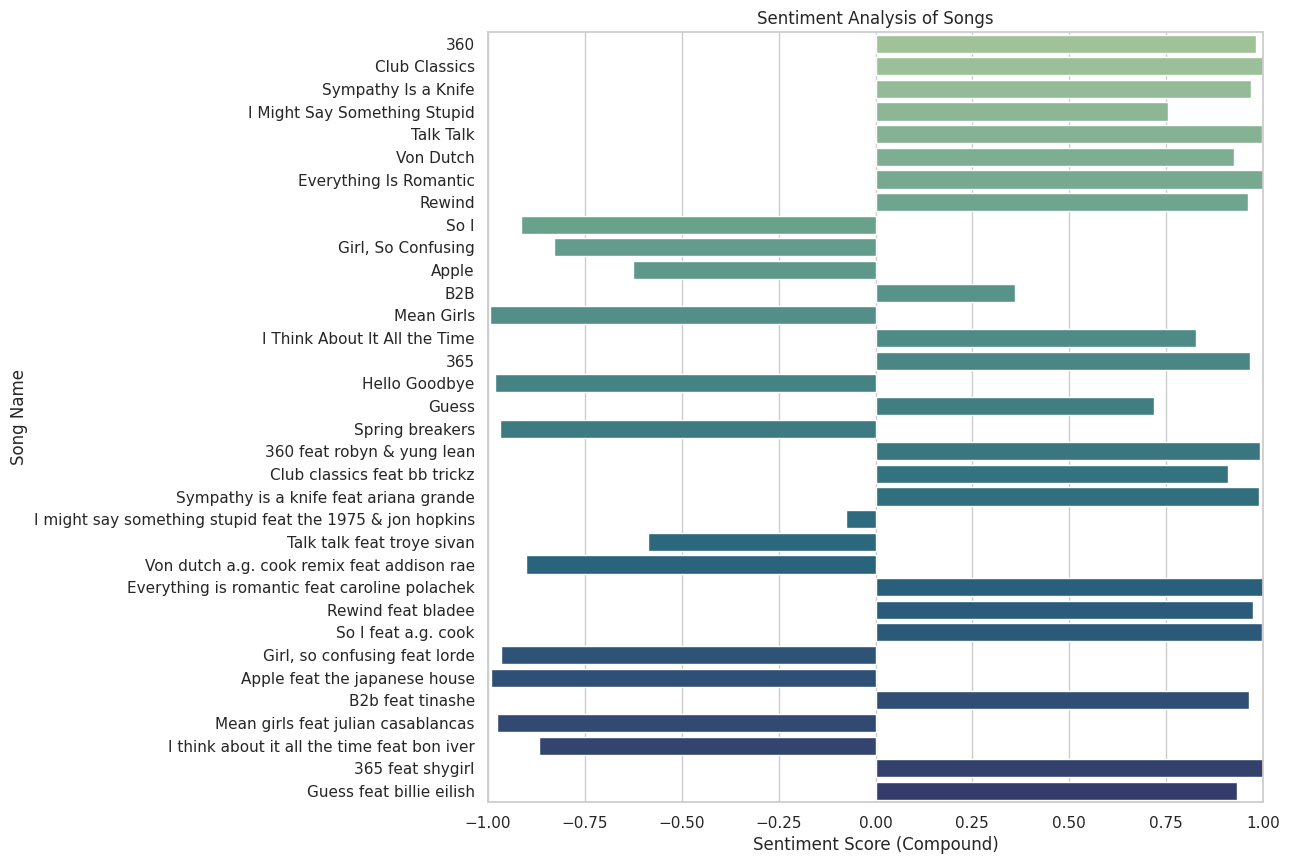

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style
sns.set(style="whitegrid")

# Plot Sentiment Scores with switched axes
plt.figure(figsize=(10, 10))
sns.barplot(x='sentiment', y='track', data=df, hue='track', legend=False, palette='crest')
plt.title('Sentiment Analysis of Songs')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Song Name')
plt.xlim(-1, 1)  # Sentiment scores range from -1 to 1
plt.show()

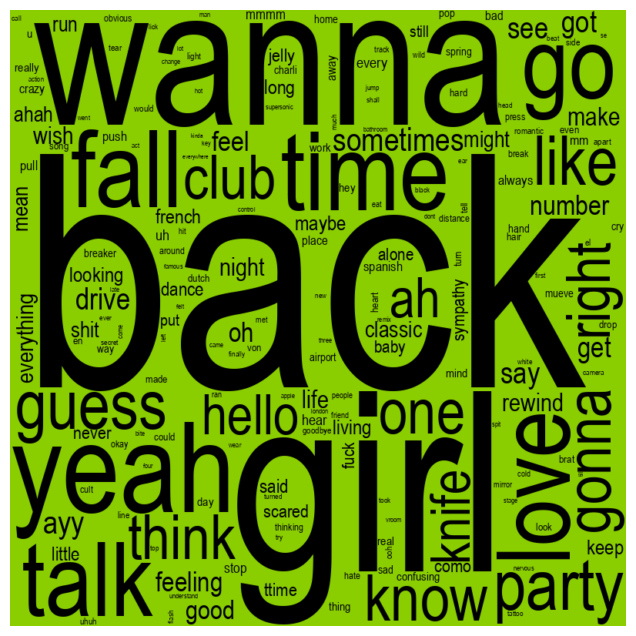

In [ ]:
from wordcloud import WordCloud
from collections import Counter

# Combine all lyrics into one string for the word cloud
all_lyrics = ' '.join(df['cleaned_lyrics'])

# Create a WordCloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lyrics)
wordcloud = WordCloud(width=800,
                      height=800,
                      background_color='#8ACE00',
                      max_words=200,
                      color_func=lambda *args, **kwargs: "black",
                      font_path="arialnarrow.ttf"
                      ).generate_from_frequencies(Counter([i.strip() for i in all_lyrics.lower().split()]))

# Plot the WordCloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Bag of Words Word Cloud')
plt.show()

In [ ]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Sample lyrics
lyrics = df['cleaned_lyrics'][2]

# Analyze the sentiment
result = sentiment_analyzer(lyrics)
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'NEGATIVE', 'score': 0.9949459433555603}]


In [ ]:
from transformers import pipeline

# Load the sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

#Use from DistilBertTokenizer might get better results?

# Function to analyze sentiment and return a score between -1 and 1
def analyze_sentiment(lyrics):
    try:
      # print(lyrics)
      result = sentiment_analyzer(lyrics)[0]  # Analyze the sentiment of the lyrics
      # print(result)
      label = result['label']
      confidence = result['score']

      # Map to a -1 to 1 scale
      if label == 'POSITIVE':
          return confidence  # Positive sentiment: score between 0 and 1
      elif label == 'NEGATIVE':
          return -confidence  # Negative sentiment: score between -1 and 0
    except:
      print("LYRICS", lyrics)

# Apply the sentiment analyzer to the entire 'cleaned_lyrics' column
df['sentiment_score'] = df['cleaned_lyrics'].apply(analyze_sentiment)

# Display the DataFrame with the sentiment scores
print(df[['track', 'sentiment_score']])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                                                track  sentiment_score
0                                                 360        -0.990425
1                                       Club Classics         0.986732
2                                 Sympathy Is a Knife        -0.994946
3                        I Might Say Something Stupid        -0.986813
4                                           Talk Talk        -0.996351
5                                           Von Dutch        -0.990555
6                              Everything Is Romantic        -0.977691
7                                              Rewind        -0.974823
8                                                So I        -0.982354
9                                  Girl, So Confusing        -0.990199
10                                              Apple        -0.993386
11                                                B2B        -0.982808
12                                         Mean Girls        -0.981805
13    

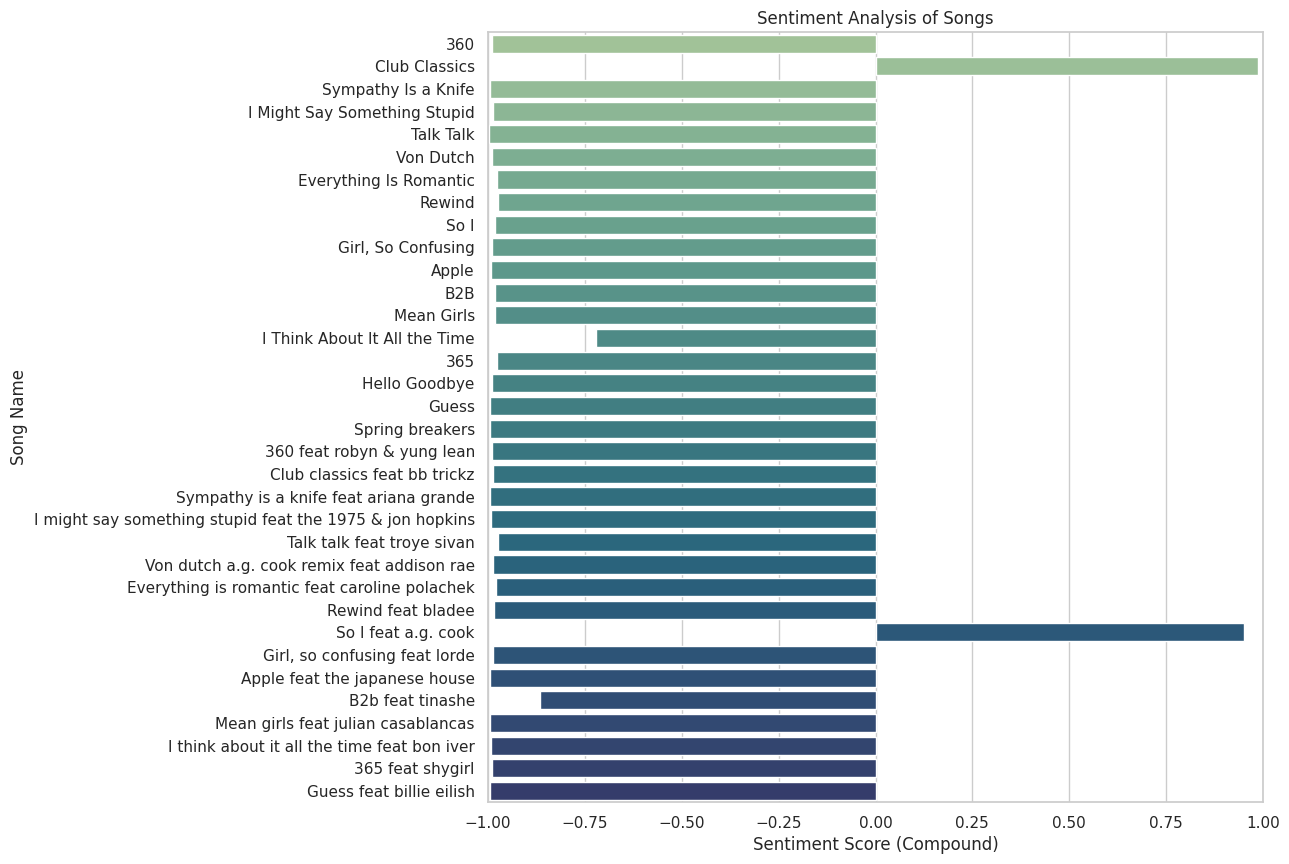

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style
sns.set(style="whitegrid")

# Plot Sentiment Scores with switched axes
plt.figure(figsize=(10, 10))
sns.barplot(x='sentiment_score', y='track', data=df, hue='track', legend=False, palette='crest')
plt.title('Sentiment Analysis of Songs')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Song Name')
plt.xlim(-1, 1)  # Sentiment scores range from -1 to 1
plt.show()

In [ ]:
from transformers import pipeline

# Load a pre-trained emotion detection model
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Sample lyrics
lyrics = df['cleaned_lyrics'][2]

# Analyze the emotions
result = emotion_analyzer(lyrics)
print(result)


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


[{'label': 'fear', 'score': 0.97764652967453}]


In [ ]:
from transformers import pipeline
import pandas as pd
import random

# Load a pre-trained emotion detection model, predicts Ekman's 6 basic emotions, plus a neutral class
emotion_analyzer = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
# df = pd.DataFrame({'cleaned_lyrics': ['...','...']})

# Function to analyze emotions
def analyze_emotions(lyrics):
    # Analyze the emotions of the lyrics
    result = emotion_analyzer(lyrics)
    # Extract the emotion with the highest score
    return result[0]['label']

# Apply the emotion analyzer to the entire 'cleaned_lyrics' column
df['emotion'] = df['cleaned_lyrics'].apply(analyze_emotions)

# Display the DataFrame with the emotion scores
df[['track', 'emotion']]


,track,emotion
0,360,surprise
1,Club Classics,neutral
2,Sympathy Is a Knife,fear
3,I Might Say Something Stupid,fear
4,Talk Talk,fear
5,Von Dutch,anger
6,Everything Is Romantic,joy
7,Rewind,sadness
8,So I,sadness
9,"Girl, So Confusing",sadness


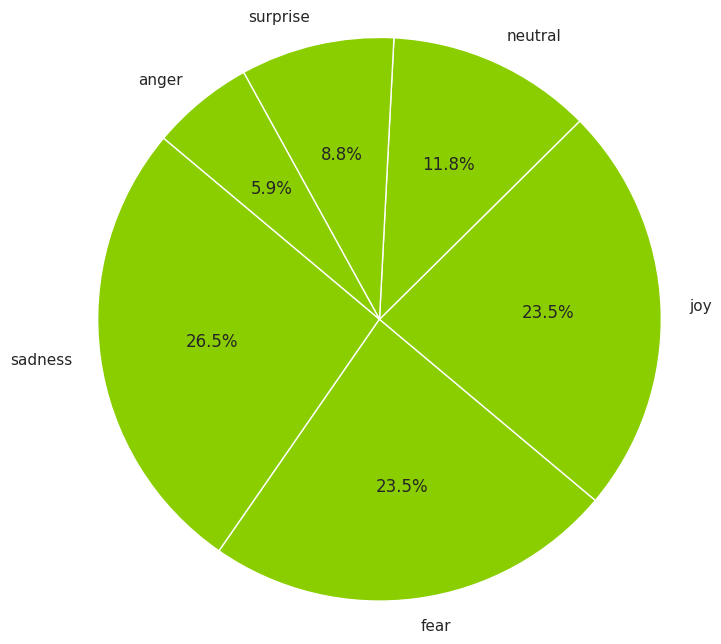

In [ ]:
emotion_counts = df['emotion'].value_counts()
green_colors = ['#8ACE00']*5

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=green_colors[:len(emotion_counts)])
# plt.title('Emotion Distribution in Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

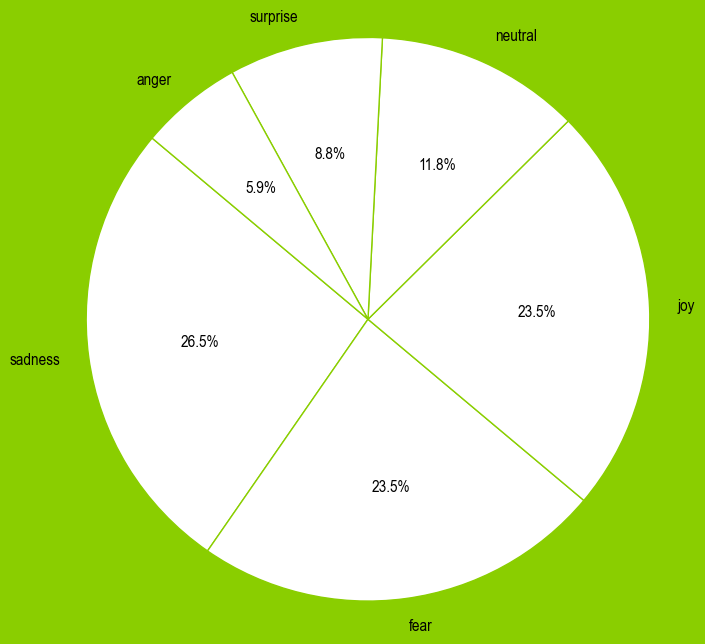

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# Path to your custom font file (e.g., "arialnarrow.ttf")
font_path = "arialnarrow.ttf"
custom_font = fm.FontProperties(fname=font_path)

# Data for pie chart
emotion_counts = df['emotion'].value_counts()

# Generate varying shades of green
green_colors = ['#FFFFFF']*5

# Plotting the pie chart with custom font
plt.figure(figsize=(8, 8), facecolor='#8ACE00')
plt.pie(emotion_counts,
        labels=emotion_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        wedgeprops={"edgecolor":"#8ACE00",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True},
        colors=green_colors[:len(emotion_counts)],  # Use varying shades of green
        textprops={'fontproperties': custom_font, 'color': 'black'})  # Set custom font and black text

# Ensure the pie chart is circular
plt.axis('equal')
plt.show()


In [ ]:
from transformers import pipeline
import pandas as pd

# Load a pre-trained emotion detection model
emotion_analyzer = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")

# Sample DataFrame for demonstration (replace this with your actual DataFrame)
# df = pd.DataFrame({'cleaned_lyrics': ['...','...']})

# Function to analyze emotions
def analyze_emotions(lyrics):
    # Analyze the emotions of the lyrics
    result = emotion_analyzer(lyrics)
    # Extract the emotion with the highest score
    return result[0]['label']

# Apply the emotion analyzer to the entire 'cleaned_lyrics' column
df['emotion'] = df['cleaned_lyrics'].apply(analyze_emotions)

# Display the DataFrame with the emotion scores
df[['track', 'emotion']]


config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,track,emotion
0,360,love
1,Club Classics,neutral
2,Sympathy Is a Knife,neutral
3,I Might Say Something Stupid,neutral
4,Talk Talk,neutral
5,Von Dutch,neutral
6,Everything Is Romantic,love
7,Rewind,neutral
8,So I,sadness
9,"Girl, So Confusing",confusion


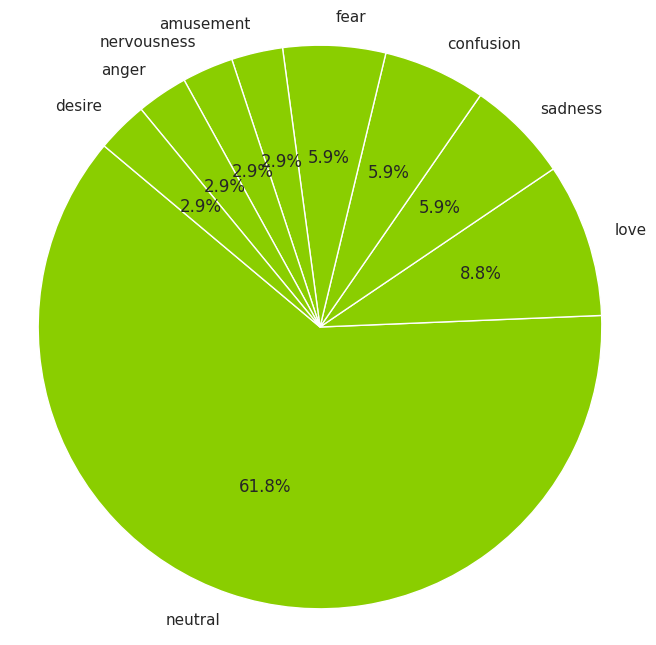

In [ ]:
emotion_counts = df['emotion'].value_counts()
green_colors = ['#8ACE00']*5

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140, colors=green_colors[:len(emotion_counts)])
# plt.title('Emotion Distribution in Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [ ]:
def preprocess(lyrics):
    # Replace newline characters with space and remove extra whitespace
    lyrics = re.sub(r'\s+', ' ', lyrics.replace('\n', ' ')).strip()

    # Convert to lowercase
    lyrics = lyrics.lower()

    # Remove punctuation using regex
    lyrics = re.sub(r'[^\w\s\']', '', lyrics)

    # Tokenize the lyrics
    tokens = lyrics.split()

    # Initialize the lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Remove stopwords and lemmatize the tokens
    stop_words = set(stopwords.words('english'))
    tokens = [lemmatizer.lemmatize(word.strip()) for word in tokens if word.isalpha() and word not in stop_words]

    return tokens

# Assume df['lyrics'] contains the text data
df['tokens'] = df['lyrics'].apply(preprocess)

In [ ]:
flat_list = [token for sublist in df['tokens'] for token in sublist]

# Create a Counter to count unique words
word_counter = Counter(flat_list)

In [ ]:
# Create a document-term matrix
# vectorizer = CountVectorizer(ngram_range=(1, 2), lowercase=False) #1,2 signifies bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), lowercase=False) #1,2 signifies bigrams
dtm = vectorizer.fit_transform(list(word_counter.keys()))

# Get feature names
terms = vectorizer.get_feature_names_out()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Set the number of topics
n_topics = 3

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, max_iter=20, random_state=42)
lda_model.fit(dtm)

LatentDirichletAllocation(max_iter=20, n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Display the top words for each topic
display_topics(lda_model, terms, 10)

Topic 0:
totally guess sat nick hay se post ayy another fear
Topic 1:
next spit spread everything xcx realest shadow globe mine pic
Topic 2:
smothered aunque list woke took arco internet foot whyyyy wet
Topic 3:
splat juice fallen fingering bought volatilе never guеss stuck tiiime
Topic 4:
honestly lemon endless dont fanatic dutch promo choke away demo


In [ ]:
import gensim
from gensim.corpora import Dictionary

# Create a dictionary from the tokenized data
dictionary = Dictionary(df['tokens'])

# Filter out extremes to limit the number of tokens
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

num_topics = 2

# Train LDA model using gensim
lda_gensim = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_gensim.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.253*"back" + 0.053*"talk" + 0.049*"guess" + 0.046*"go" + 0.038*"gonna" + 0.035*"club" + 0.035*"one" + 0.035*"right" + 0.029*"ah" + 0.024*"drive"
Topic 1: 0.209*"girl" + 0.067*"time" + 0.061*"fall" + 0.060*"love" + 0.053*"party" + 0.039*"think" + 0.033*"sometimes" + 0.022*"say" + 0.021*"good" + 0.020*"feel"


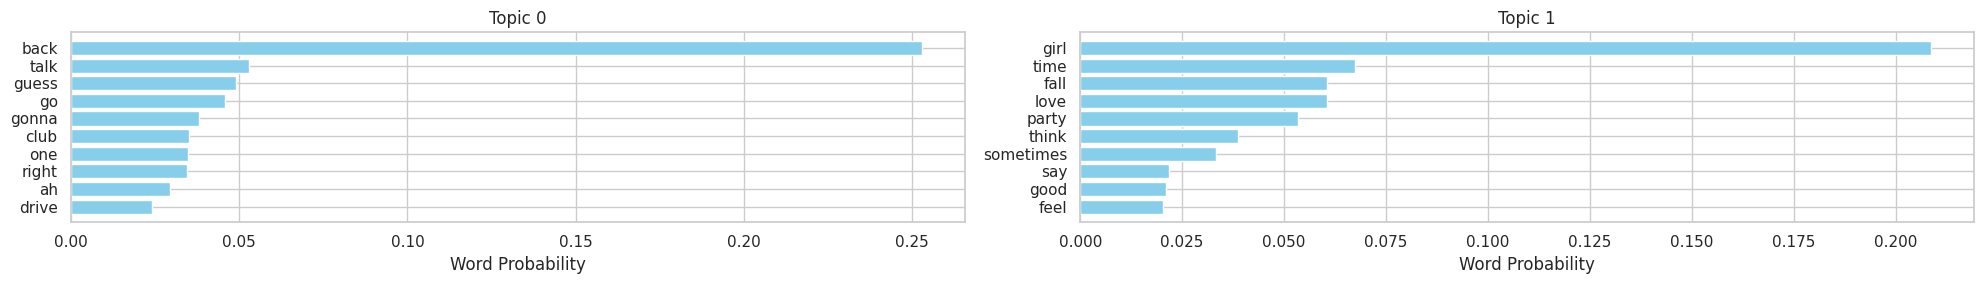

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to extract top words for each topic
def get_top_words(lda_model, num_words=10):
    topics = lda_model.print_topics(num_words=num_words)
    top_words = {}
    for idx, topic in topics:
        top_words[idx] = [word.split('*')[1].strip(' " ') for word in topic.split('+')]
    return top_words

# Get top words for each topic
top_words = get_top_words(lda_gensim, num_words=10)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_topics, figsize=(20, 3))

# Ensure we only plot the available topics
for idx, (topic_num, words) in enumerate(top_words.items()):
    if idx >= num_topics:  # Stop if we've reached the number of desired topics
        break
    ax = axes[idx]
    # Get the counts for the top words in this topic
    counts = [lda_gensim.get_topic_terms(topic_num, topn=10)[i][1] for i in range(len(words))]
    ax.barh(words, counts, color='skyblue')
    ax.set_title(f'Topic {topic_num}')
    ax.invert_yaxis()  # Invert y-axis to have the highest count on top
    ax.set_xlabel('Word Probability')

# Hide any unused subplots if the number of topics is less than num_topics
for j in range(len(top_words), num_topics):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
len(top_words)

2

In [ ]:
# use word embeddings to create clusters
# get a centroid for each cluster
# get a word similar to it as the topic